In [3]:
import pandas as pd

df = pd.read_csv("./data/scrape.csv.gz")

In [4]:
df

,station,line,towards,contdown,time
0,Längenfeldgasse U,12A,Eichenstraße,"[6, 13, 24, 34, 44, 54, 64]",1.637752e+09
1,Längenfeldgasse U,12A,"Schmelz, Gablenzgasse","[1, 12, 21, 30, 40, 50, 60]",1.637752e+09
2,"Flurschützstraße, Längenfeldgasse",62,"Lainz, Wolkersbergenstraße","[3, 11, 17, 25, 32, 40, 47, 55, 62]",1.637752e+09
3,"Flurschützstraße, Längenfeldgasse",62,"Oper, Karlsplatz U","[0, 8, 14, 25, 30, 38, 45, 53, 60, 68]",1.637752e+09
4,Flurschützstraße / Längenfeldgasse,63A,Am Rosenhügel,"[0, 12, 22, 32, 42, 52, 59, 67]",1.637752e+09
...,...,...,...,...,...
711281,Längenfeldgasse,U4,HEILIGENSTADT,"[0, 6, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711282,Längenfeldgasse,U4,HÜTTELDORF,"[1, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...",1.638530e+09
711283,Längenfeldgasse,U6,FLORIDSDORF,"[4, 8, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47,...",1.638530e+09
711284,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09


In [5]:
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]

In [6]:
import numpy as np
df_u6S = df.loc[(df['line'] == 'U6') & (df['towards'] == 'SIEBENHIRTEN')]
times = np.array(df_u6S['time'])

dt = np.diff(times, 1)
dtform = np.append([0], dt) # add an 0 at the beginning to match up with the df
df_u6S = df_u6S.assign(dt=dtform)

In [7]:
df_u6S

,station,line,towards,contdown,time,dt
9,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 6, 9, 13, 18, 21, 24, 29, 33, 37, 42, 45, ...",1.637752e+09,0.000000
21,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 5, 8, 12, 17, 20, 23, 28, 32, 36, 41, 44, ...",1.637752e+09,59.762884
33,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.322638
45,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.369688
57,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.416961
...,...,...,...,...,...,...
711236,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.379536
711248,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.323791
711260,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.387397
711272,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.333113


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb48881430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb48881a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb48881160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb48881f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb4888f280>],
 'means': []}

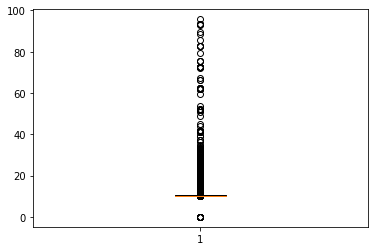

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(dt[dt < 100])

Objective: Calculate how long a particular time is displayed.

In [9]:
df_u6S

,station,line,towards,contdown,time,dt
9,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 6, 9, 13, 18, 21, 24, 29, 33, 37, 42, 45, ...",1.637752e+09,0.000000
21,Längenfeldgasse,U6,SIEBENHIRTEN,"[1, 5, 8, 12, 17, 20, 23, 28, 32, 36, 41, 44, ...",1.637752e+09,59.762884
33,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.322638
45,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.369688
57,Längenfeldgasse,U6,SIEBENHIRTEN,"[0, 4, 7, 11, 16, 19, 22, 27, 31, 35, 40, 43, ...",1.637752e+09,10.416961
...,...,...,...,...,...,...
711236,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.379536
711248,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.323791
711260,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.387397
711272,Längenfeldgasse,U6,SIEBENHIRTEN,"[2, 11, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48...",1.638530e+09,10.333113


In [10]:
df_u6S_clean = df_u6S.loc[(df_u6S['dt'] < 12) & (df_u6S['dt'] > 6)]

In [11]:
dt = np.array(df_u6S_clean['dt'])
cntdwn = np.array(df_u6S_clean['contdown'])

import json

cntdwn = [json.loads(x) for x in cntdwn]


In [12]:
df_t_dt = pd.DataFrame(cntdwn)
df_t_dt.insert(0, 'dt', dt)
df_t_dt


,dt,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,10.322638,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.369688,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.416961,0,4,7.0,11.0,16.0,19.0,22.0,27.0,31.0,...,62.0,66.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.382459,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.374851,2,5,9.0,14.0,17.0,20.0,25.0,29.0,33.0,...,64.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54050,10.379536,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54051,10.323791,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54052,10.387397,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54053,10.333113,2,11,12.0,16.0,20.0,24.0,28.0,32.0,36.0,...,65.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
arr = df_t_dt[0][0]
accum_time = 0
results = list()
incomplete_train = True

for dt, col0 in zip(df_t_dt['dt'], df_t_dt[0]):
    if incomplete_train:
        if incomplete_train_time == col0:
            pass
        else:
            incomplete_train = False

    if col0 == arr:
        accum_time += dt
    elif col0 > arr and not incomplete_train:
        # if the display is updated for the next train we need to exempt this minute because it might already have started
        incomplete_train = True
        incomplete_train_time = col0
    else:
        accum_time += dt
        results.append((accum_time, arr))
        accum_time = 0
        arr = col0

results

NameError: name 'incomplete_train_time' is not defined

In [14]:
df_res = pd.DataFrame(results)
df_res.columns = ['time', 'arrival']
df_res_means = df_res.pivot_table(values='time', index='arrival', aggfunc=np.mean)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [15]:
df_res_means.plot.bar(figsize=(7.5,5))
plt.hlines(60, xmin=0, xmax=36, color="black")
plt.xlabel("arrival time")
plt.ylabel("mean duration of a minute [s]")
plt.show()

NameError: name 'df_res_means' is not defined

In [ ]:
df_t_dt[['dt', 0]]

,dt,0
0,10.322638,0
1,10.369688,0
2,10.416961,0
3,10.382459,2
4,10.374851,2
...,...,...
54050,10.379536,2
54051,10.323791,2
54052,10.387397,2
54053,10.333113,2


# Different approach with train-tracking

In [170]:
import json

# fix column name, reorder columns
df = df_u6S.rename(columns={'contdown':'countdown'})[['station', 'line', 'towards', 'time', 'countdown']]

# convert countdown list to columns
cntdwn = df['countdown']
cntdwn = pd.DataFrame([json.loads(x) for x in cntdwn])
cntdwn = cntdwn.set_index(df.index)

df_comb = pd.concat([df, cntdwn], axis=1).drop(columns='countdown')
df_subset = df_comb.iloc[19100:19200]
df_subset

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
215508,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215520,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215532,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215544,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215556,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215568,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215580,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215592,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215604,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215616,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,23.0,33.0,43.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 32
df_subset

,station,line,towards,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
215508,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215520,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215532,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,25.0,35.0,45.0,55.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215544,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,5,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215556,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215568,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215580,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215592,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215604,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,24.0,34.0,44.0,54.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215616,Längenfeldgasse,U6,SIEBENHIRTEN,1.638072e+09,4,16,23.0,33.0,43.0,53.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
trains = pd.DataFrame(columns=['train-ID', 'track_start', 'arrival', *range(len(cntdwn.columns)) ])
trains

,train-ID,track_start,arrival,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25


In [281]:
class vehicle():
    '''
    implements a vehicle class that is used internally to track vehicles across time
    '''
    def __init__(self, firstSeen, cntdwn, position) -> None:
        self.firstSeen = firstSeen # timestamp at which the vehicle was first seen
        self.arrivedAt = None # timestamp at which the vehicle actually arrived
        self.times = pd.DataFrame({'countdown': [cntdwn], 'start': [firstSeen], 'end': [pd.NA], 'complete': [False]}) # dataframe containing countdown value, start of countdown value and end of countdown value
        self.position = position
        self.arrived = False # to keep track if the vehicle has arrived yet or is still pending

    def arrive(self, time):
        self.arrived = True
        self.arrivedAt = time
        self.position = -1
        self.times.at[self.times.index[-1], 'end'] = time
        if len(self.times) > 1:
            # consider the track complete if there was an entry before
            self.times.at[self.times.index[-1], 'complete'] = True

    def trackTime(self, time, cntwns):
        # TODO
        # refreshes the times dataframe based on a new timestamp and a new countdown array
        print(cntwns, self.position)
        if not self.times.at[self.times.index[-1], 'countdown'] == cntwns[self.position]:
            # if the time changed at the position of the vehicle, set the end time and start a new row
            self.times.at[self.times.index[-1], 'end'] = time

            if len(self.times) > 1:
                # the frist one is always incomplete. afterwards, the tracking is assumed to be complete.
                self.times.at[self.times.index[-1], 'complete'] = True

            self.times = self.times.append({'countdown': cntwns[self.position], 'start': time, 'end': pd.NA, 'complete': False}, ignore_index=True)
            



In [282]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

traintrack = list()
all_vehicles = pd.DataFrame({'vehicle':[], 'arrived':[], 'active':[], 'lastPos':[]})
prev_cntwn = list()
max_diff = 15

for index, row in df_subset.iterrows():
    row = row.dropna()

# if there are no trains in the all_vehicles, we're on the first line and we have all new vehicles.
    if len(all_vehicles) == 0:
        for i, cntdwn in enumerate(row[4:].values):
            all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], cntdwn, i), 'arrived':0, 'active': 1, 'lastPos':i}, ignore_index=True)
        

    # Otherwise, we already have trains in all_vehicles and we can start tracking
    #elif np.array_equal(row[4:].values, prev_cntwn):
    #    # in case there was no change, we can directly move on.
    #    logging.debug("no change observed, moving on")
    #    pass
    
    else:
        # if there was a change, first check if the time difference was within limits
        if row['time'] - prev_row['time'] < max_diff:
            # do a tracking step
            # TODO: add new trains if they appear
            
            if row[0] > prev_cntwn[0]:
            #shift vehicle position by one if the next countdown is larger than the last one and set the first train to arrived
            #TODO: keep track of times

                logging.debug("shift frame by one")
                for idx, v in all_vehicles.loc[all_vehicles['active'] == 1].iterrows():
                    all_vehicles.at[idx, 'lastPos'] -= 1
                    all_vehicles.at[idx, 'vehicle'].position -= 1
                    
                    if all_vehicles.at[idx, 'lastPos'] < 0:
                        all_vehicles.at[idx, 'arrived'] = 1
                        all_vehicles.at[idx, 'active'] = 0
                        all_vehicles.at[idx, 'vehicle'].arrive(row['time'])

                    else:

                        all_vehicles.at[idx, 'vehicle'].trackTime(row['time'], row[4:].values)

            else:
                # TODO
                # keep track of the changed times
                # add new trains if they appear (check len of na-free df)
                logging.debug("time changed without frameshift")

        else:
            # TODO
            # close all open trains and begin new ones
            logging.debug(f"time differnce over threshold ({row['time'] - prev_row['time']}). closing all trains")
            for idx, v in all_vehicles.loc[all_vehicles['active'] == 1].iterrows():
                all_vehicles.at[idx, 'active'] = 0

            print(f"idx: {index}: {row[4:].values}")

            for i, cntdwn in enumerate(row[4:].values):
                #opening new vehicles
                print(f"new vehicle {cntdwn}, {i}")
                all_vehicles = all_vehicles.append({'vehicle': vehicle(row['time'], cntdwn, i), 'arrived':0, 'active': 1, 'lastPos':i}, ignore_index=True)
            
    prev_row = row
    prev_cntwn = row[4:].values



idx: 215892: [0 11 19.0 29.0 39.0 49.0 59.0 69.0]
new vehicle 0, 0
new vehicle 11, 1
new vehicle 19.0, 2
new vehicle 29.0, 3
new vehicle 39.0, 4
new vehicle 49.0, 5
new vehicle 59.0, 6
new vehicle 69.0, 7
[10 19 29.0 39.0 49.0 59.0 69.0] 0
[10 19 29.0 39.0 49.0 59.0 69.0] 1
[10 19 29.0 39.0 49.0 59.0 69.0] 2
[10 19 29.0 39.0 49.0 59.0 69.0] 3
[10 19 29.0 39.0 49.0 59.0 69.0] 4
[10 19 29.0 39.0 49.0 59.0 69.0] 5
[10 19 29.0 39.0 49.0 59.0 69.0] 6
[9 19 28.0 38.0 48.0 58.0 68.0] 0
[9 19 28.0 38.0 48.0 58.0 68.0] 1
[9 19 28.0 38.0 48.0 58.0 68.0] 2
[9 19 28.0 38.0 48.0 58.0 68.0] 3
[9 19 28.0 38.0 48.0 58.0 68.0] 4
[9 19 28.0 38.0 48.0 58.0 68.0] 5


In [283]:
all_vehicles

,vehicle,arrived,active,lastPos
0,<__main__.vehicle object at 0x7fbb47686eb0>,0.0,0.0,0.0
1,<__main__.vehicle object at 0x7fbb476578e0>,0.0,0.0,1.0
2,<__main__.vehicle object at 0x7fbb476577c0>,0.0,0.0,2.0
3,<__main__.vehicle object at 0x7fbb476865e0>,0.0,0.0,3.0
4,<__main__.vehicle object at 0x7fbb4769bb50>,0.0,0.0,4.0
5,<__main__.vehicle object at 0x7fbb47686d30>,0.0,0.0,5.0
6,<__main__.vehicle object at 0x7fbb4769beb0>,0.0,0.0,6.0
7,<__main__.vehicle object at 0x7fbb476af700>,1.0,0.0,-1.0
8,<__main__.vehicle object at 0x7fbb4769b4c0>,1.0,0.0,-1.0
9,<__main__.vehicle object at 0x7fbb479205b0>,0.0,1.0,0.0


In [284]:
for i, v in all_vehicles.iterrows():
    print("------")
    print(v['vehicle'].times)

------
   countdown         start   end  complete
0          5  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0         16  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0       25.0  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0       35.0  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0       45.0  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0       55.0  1.638072e+09  <NA>     False
------
   countdown         start   end  complete
0       65.0  1.638072e+09  <NA>     False
------
   countdown         start                end  complete
0          0  1.638072e+09  1638072280.302267     False
------
   countdown         start                end  complete
0         11  1.638072e+09  1638072280.302267     False
1         10  1.638072e+09  1638072931.190754      True
------
   countdown         start                end  c

In [81]:
for i, r in all_vehicles.iterrows():
    print(r['vehicle'].times)

   countdown         start   end  complete
0         13  1.638069e+09  <NA>     False
   countdown         start   end  complete
0         34  1.638069e+09  <NA>     False
   countdown         start   end  complete
0       47.0  1.638069e+09  <NA>     False
   countdown         start   end  complete
0       56.0  1.638069e+09  <NA>     False
   countdown         start   end  complete
0       66.0  1.638069e+09  <NA>     False
